In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [2]:
df = pd.read_csv('./especies_combu_polygon.csv')
df.head()

,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,extensions,basisOfRecord,occurrenceStatus,taxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,speciesKey,acceptedTaxonKey,scientificName,acceptedScientificName,kingdom,phylum,order,family,genus,species,genericName,specificEpithet,taxonRank,taxonomicStatus,iucnRedListCategory,dateIdentified,decimalLatitude,decimalLongitude,continent,stateProvince,gadm,year,month,day,eventDate,startDayOfYear,endDayOfYear,issues,modified,lastInterpreted,references,license,isSequenced,identifiers,media,facts,relations,isInCluster,datasetName,recordedBy,identifiedBy,geodeticDatum,class,countryCode,recordedByIDs,identifiedByIDs,gbifRegion,country,publishedByGbifRegion,rightsHolder,identifier,http://unknown.org/nick,verbatimEventDate,collectionCode,verbatimLocality,gbifID,occurrenceID,taxonID,catalogNumber,institutionCode,eventTime,http://unknown.org/captive,identificationID,lifeStage,coordinateUncertaintyInMeters,informationWithheld,occurrenceRemarks,infraspecificEpithet,individualCount,vernacularName,taxonConceptID,locality,sex,recordNumber,municipality,ownerInstitutionCode,collectionID,establishmentMeans,identificationRemarks,higherGeography,institutionKey,preparations,county,language,type,samplingProtocol,habitat,identificationVerificationStatus,eventType,networkKeys,collectionKey,otherCatalogNumbers,institutionID,fieldNotes,bibliographicCitation,elevation,elevationAccuracy,associatedSequences,dynamicProperties,associatedTaxa,rights,disposition,accessRights,nomenclaturalCode,verbatimElevation,georeferencedBy,http://unknown.org/recordID,georeferenceVerificationStatus,identificationQualifier,http://unknown.org/recordEnteredBy,higherClassification,georeferenceSources,typeStatus,georeferencedDate,georeferenceProtocol,locationAccordingTo,footprintWKT,verbatimCoordinateSystem,organismID,previousIdentifications
0,4854782149,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-09-20T15:47:23.061+00:00,2024-09-21T09:37:16.371+00:00,486,{},HUMAN_OBSERVATION,PRESENT,3168943,6,7707728.0,220.0,414.0,8801.0,3168942.0,3168943.0,3168943.0,Hippobroma longiflora (L.) G.Don,Hippobroma longiflora (L.) G.Don,Plantae,Tracheophyta,Asterales,Campanulaceae,Hippobroma,Hippobroma longiflora,Hippobroma,longiflora,SPECIES,ACCEPTED,NE,2024-05-04T01:48:20,-1.504886,-48.462257,SOUTH_AMERICA,Pará,"{'level0': {'gid': 'BRA', 'name': 'Brazil'}, '...",2024.0,3.0,16.0,2024-03-16T12:54,76.0,76.0,"['COORDINATE_ROUNDED', 'CONTINENT_DERIVED_FROM...",2024-05-05T22:22:37.000+00:00,2024-09-21T09:37:16.371+00:00,https://www.inaturalist.org/observations/21330...,http://creativecommons.org/licenses/by-nc/4.0/...,False,[{'identifier': '213300731'}],[],[],[],False,iNaturalist research-grade observations,Fernando J. M. Rojas-Runjaic,Fernando J. M. Rojas-Runjaic,WGS84,Magnoliopsida,BR,[],[],LATIN_AMERICA,Brazil,NORTH_AMERICA,Fernando J. M. Rojas-Runjaic,213300731,rojas-runjaic,2024/03/16 12:54 PM,Observations,"Belém - Pará, Brasil",4854782149,https://www.inaturalist.org/observations/21330...,154827,213300731,iNaturalist,12:54:00-03:00,wild,481824413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4868048393,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-09-20T15:47:23.061+00:00,2024-09-21T09:37:19.948+00:00,486,{},HUMAN_OBSERVATION,PRESENT,3733807,6,7707728.0,220.0,408.0,4160847.0,8398900.0,3733807.0,3733807.0,Bonnaya antipoda (L.) Druce,Bonnaya antipoda (L.) Druce,Plantae,Tracheophyta,Lamiales,Linderniaceae,Bonnaya,Bonnaya antipoda,Bonnaya,an

In [3]:
colunas_relevantes = ["publishingCountry", "scientificName", "kingdom", "phylum","genericName", "iucnRedListCategory", "year", "month","decimalLatitude", "decimalLongitude", "class"]
df = df[colunas_relevantes]
df.head()

,publishingCountry,scientificName,kingdom,phylum,genericName,iucnRedListCategory,year,month,decimalLatitude,decimalLongitude,class
0,US,Hippobroma longiflora (L.) G.Don,Plantae,Tracheophyta,Hippobroma,NE,2024.0,3.0,-1.504886,-48.462257,Magnoliopsida
1,US,Bonnaya antipoda (L.) Druce,Plantae,Tracheophyta,Bonnaya,LC,2024.0,3.0,-1.504778,-48.462644,Magnoliopsida
2,US,"Iguana iguana (Linnaeus, 1758)",Animalia,Chordata,Iguana,LC,2024.0,3.0,-1.505205,-48.462697,Squamata
3,US,"Avicularia avicularia (Linnaeus, 1758)",Animalia,Arthropoda,Avicularia,NE,2024.0,4.0,-1.511736,-48.483067,Arachnida
4,US,"Butorides striata (Linnaeus, 1758)",Animalia,Chordata,Butorides,LC,2024.0,5.0,-1.493230,-48.461513,Aves


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   publishingCountry    610 non-null    object 
 1   scientificName       610 non-null    object 
 2   kingdom              610 non-null    object 
 3   phylum               609 non-null    object 
 4   genericName          603 non-null    object 
 5   iucnRedListCategory  565 non-null    object 
 6   year                 600 non-null    float64
 7   month                600 non-null    float64
 8   decimalLatitude      610 non-null    float64
 9   decimalLongitude     610 non-null    float64
 10  class                598 non-null    object 
dtypes: float64(4), object(7)
memory usage: 52.6+ KB


In [5]:
tabela_reinos = pd.crosstab(df["publishingCountry"], df["kingdom"])
print(tabela_reinos)

kingdom            Animalia  Chromista  Fungi  Plantae  Protozoa  \
publishingCountry                                                  
AR                        6          0      0        0         0   
BR                      274          0     72      140         2   
CA                        1          0      0        0         0   
GB                        0          0      1        5         0   
NL                        4          0      0        0         0   
US                       49          2     39       14         0   

kingdom            incertae sedis  
publishingCountry                  
AR                              0  
BR                              1  
CA                              0  
GB                              0  
NL                              0  
US                              0  


In [6]:
tabela_phylum = pd.crosstab(df["publishingCountry"], df["phylum"])
print(tabela_phylum)

phylum             Arthropoda  Ascomycota  Basidiomycota  Chordata  \
publishingCountry                                                    
AR                          1           0              0         5   
BR                          0          70              2       274   
CA                          1           0              0         0   
GB                          0           1              0         0   
NL                          0           0              0         4   
US                         10          39              0        39   

phylum             Euglenozoa  Myzozoa  Tracheophyta  
publishingCountry                                     
AR                          0        0             0  
BR                          2        0           140  
CA                          0        0             0  
GB                          0        0             5  
NL                          0        0             0  
US                          0        2            14  

In [7]:
tabela_reinos_filo = pd.crosstab(df["kingdom"], df["phylum"])
print(tabela_reinos_filo)

phylum     Arthropoda  Ascomycota  Basidiomycota  Chordata  Euglenozoa  \
kingdom                                                                  
Animalia           12           0              0       322           0   
Chromista           0           0              0         0           0   
Fungi               0         110              2         0           0   
Plantae             0           0              0         0           0   
Protozoa            0           0              0         0           2   

phylum     Myzozoa  Tracheophyta  
kingdom                           
Animalia         0             0  
Chromista        2             0  
Fungi            0             0  
Plantae          0           159  
Protozoa         0             0  


In [25]:
df["year"].value_counts()

year
2023.0    124
2022.0    122
2015.0     63
1989.0     61
2024.0     39
2017.0     38
2016.0     33
2018.0     25
2008.0     21
1999.0     16
2006.0     12
2014.0     11
1990.0      6
1991.0      6
2020.0      6
2011.0      5
2019.0      3
2021.0      2
1962.0      2
2013.0      1
2009.0      1
2010.0      1
2012.0      1
1984.0      1
Name: count, dtype: int64

In [51]:
anos_reino = df.groupby("year")["kingdom"].count()
anos_reino = pd.DataFrame(anos_reino)
anos_reino

,kingdom
year,
1962.0,2
1984.0,1
1989.0,61
1990.0,6
1991.0,6
1999.0,16
2006.0,12
2008.0,21
2009.0,1


In [65]:
anos_reino = df.loc[df["kingdom"] == "Animalia"].groupby("year")["kingdom"].count()
anos_reino

year
1989.0     20
1990.0      2
1991.0      6
1999.0     16
2011.0      3
2017.0     27
2018.0      7
2019.0      2
2021.0      1
2022.0    121
2023.0     97
2024.0     32
Name: kingdom, dtype: int64

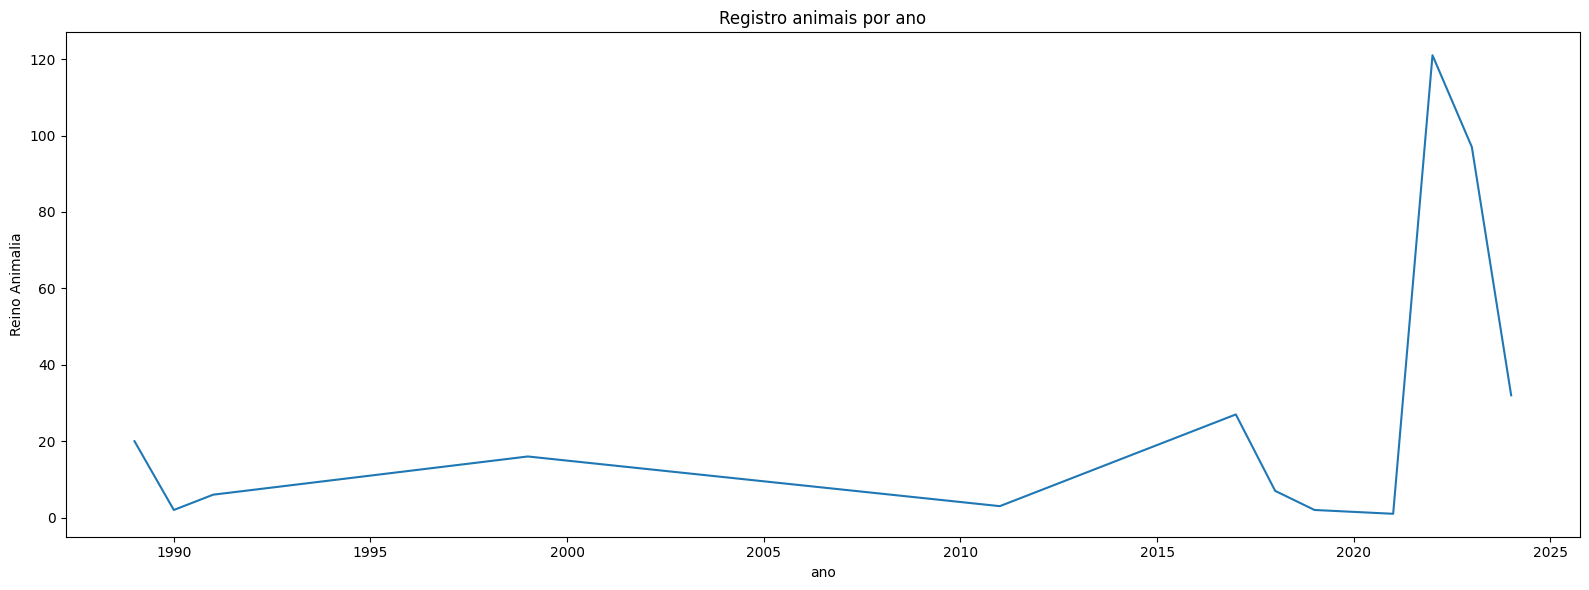

In [74]:
plt.figure(figsize=(16,6))
plt.title("Registro animais por ano")
plt.xlabel("ano")
plt.ylabel("Reino Animalia")
sns.lineplot(anos_reino)
plt.tight_layout()
plt.savefig("registro_animais_ano.png", format="png", dpi=300) 

In [62]:
anos_peixes = df.loc[df["phylum"] == "Chordata"].groupby("year")["phylum"].count()
anos_peixes

year
1989.0     20
1990.0      2
1991.0      6
1999.0     16
2011.0      3
2017.0     27
2018.0      6
2019.0      1
2021.0      1
2022.0    119
2023.0     94
2024.0     27
Name: phylum, dtype: int64

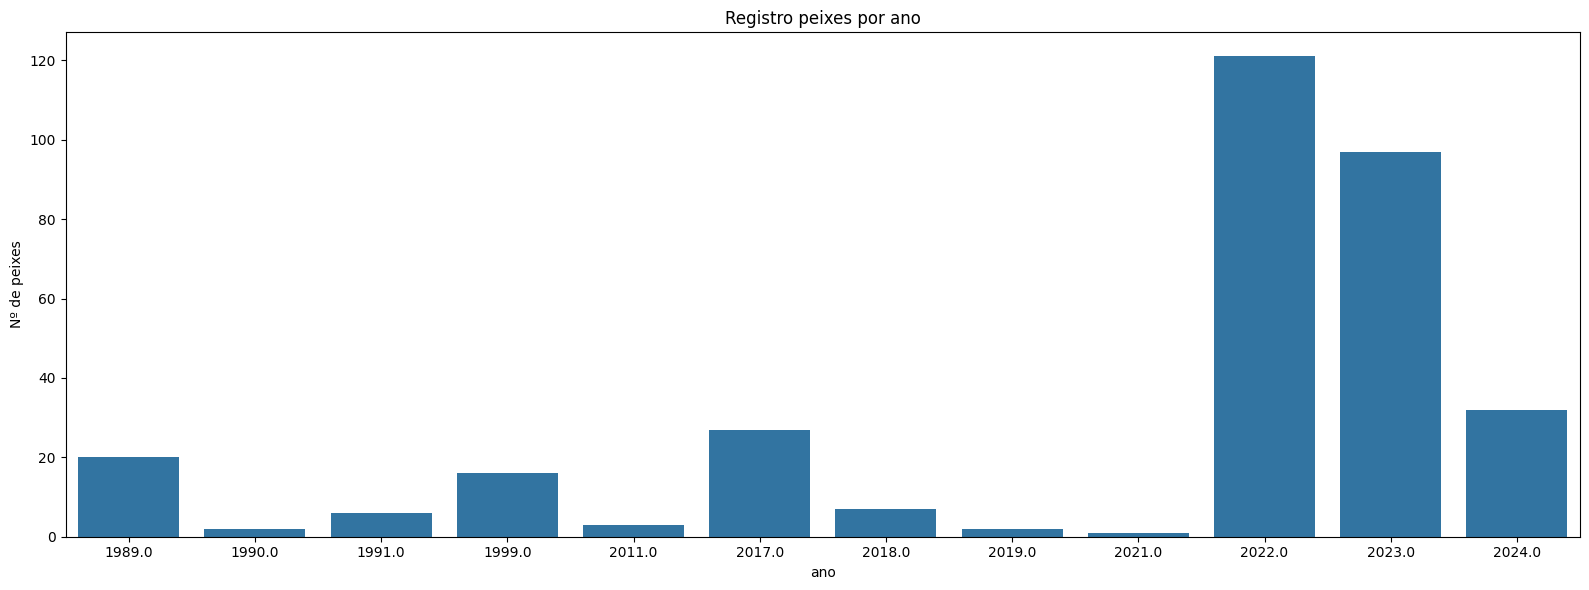

In [73]:
plt.figure(figsize=(16,6))
plt.title("Registro peixes por ano")
plt.xlabel("ano")
plt.ylabel("Nº de peixes")
sns.barplot(anos_peixes)
plt.tight_layout()
plt.savefig("registro_pexies_ano.png", format="png", dpi=300) 